# 関数などの準備

In [1]:
import matplotlib.pyplot as plt

In [2]:
def plot_train_val_loss(history):
    """エポックごとの損失の可視化"""
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

In [3]:
def plot_train_val_acc(history):
    """エポックごとのAccuracyの可視化"""
    train_acc = history.history["acc"]
    val_acc = history.history["val_acc"]

    epochs = range(1, len(train_acc) + 1)

    plt.plot(epochs, train_acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "r", label="Validation acc")

    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.0)
    plt.legend()

    plt.show()

# データの準備

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

In [5]:
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, random_state=0)

In [6]:
X_train.shape, X_val.shape, X_test.shape

((319, 30), (107, 30), (143, 30))

# モデルの構築

In [7]:
from keras import layers, models

model = models.Sequential()

model.add(layers.Dense(2, activation="relu", input_shape=(30,)))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

Using TensorFlow backend.
W0709 19:23:04.231205 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 19:23:04.246456 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 19:23:04.248894 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [8]:
# ニューラルネットワークのアーキテクチャ(構造)を確認する
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 62        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


# モデルのコンパイル

In [9]:
from keras.losses import binary_crossentropy
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(),
              loss=binary_crossentropy,
              metrics=["accuracy"])

W0709 19:23:04.397238 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 19:23:04.401777 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0709 19:23:04.405003 140735674078080 deprecation.py:323] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# モデルの訓練

In [10]:
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=(X_val, y_val),
                    verbose=1
                    )

W0709 19:23:04.583571 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 319 samples, validate on 107 samples
Epoch 1/50
319/319 [==============================] - 0s 607us/step - loss: 5.3026 - acc: 0.4201 - val_loss: 0.9025 - val_acc: 0.8131
Epoch 2/50
319/319 [==============================] - 0s 38us/step - loss: 0.6381 - acc: 0.8370 - val_loss: 0.6343 - val_acc: 0.8318
Epoch 3/50
319/319 [==============================] - 0s 31us/step - loss: 0.5226 - acc: 0.9028 - val_loss: 0.5966 - val_acc: 0.8505
Epoch 4/50
319/319 [==============================] - 0s 31us/step - loss: 0.5134 - acc: 0.9060 - val_loss: 0.5897 - val_acc: 0.8505
Epoch 5/50
319/319 [==============================] - 0s 36us/step - loss: 0.5089 - acc: 0.8997 - val_loss: 0.5744 - val_acc: 0.8224
Epoch 6/50
319/319 [==============================] - 0s 36us/step - loss: 0.5088 - acc: 0.8997 - val_loss: 0.5803 - val_acc: 0.8411
Epoch 7/50
319/319 [==============================] - 0s 31us/step - loss: 0.5073 - acc: 0.8934 - val_loss: 0.5850 - val_acc: 0.8505
Epoch 8/50
319/319 [==

#  モデルの評価

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("test_loss:", test_loss)
print("test_acc:", test_accuracy)

143/143 [==============================] - 0s 17us/step
test_loss: 0.4154938594861464
test_acc: 0.9020979020979021


# 可視化

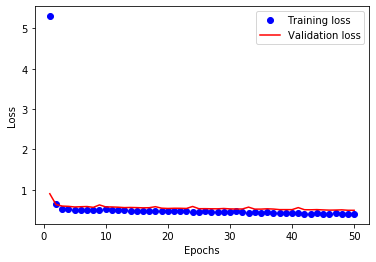

In [12]:
plot_train_val_loss(history)

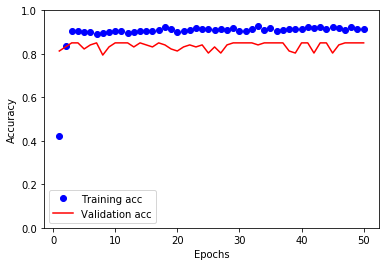

In [13]:
plot_train_val_acc(history)

# モデルを変えてみる

In [14]:
model2 = models.Sequential()

model2.add(layers.Dense(64, activation="relu", input_shape=(30,)))
model2.add(layers.Dense(32, activation="relu"))
model2.add(layers.Dense(32, activation="relu"))
model2.add(layers.Dense(1, activation="sigmoid"))

In [15]:
model2.compile(optimizer=RMSprop(),
               loss=binary_crossentropy,
               metrics=["accuracy"])

In [16]:
history2 = model2.fit(X_train,
                      y_train,
                      epochs=50,
                      validation_data=(X_val, y_val),
                      verbose=1
                      )

Train on 319 samples, validate on 107 samples
Epoch 1/50
319/319 [==============================] - 0s 785us/step - loss: 5.7983 - acc: 0.5329 - val_loss: 2.7261 - val_acc: 0.4019
Epoch 2/50
319/319 [==============================] - 0s 46us/step - loss: 1.8845 - acc: 0.6458 - val_loss: 3.6700 - val_acc: 0.4019
Epoch 3/50
319/319 [==============================] - 0s 48us/step - loss: 1.4650 - acc: 0.6991 - val_loss: 0.7011 - val_acc: 0.8037
Epoch 4/50
319/319 [==============================] - 0s 46us/step - loss: 1.5231 - acc: 0.6771 - val_loss: 0.7152 - val_acc: 0.7757
Epoch 5/50
319/319 [==============================] - 0s 47us/step - loss: 0.3168 - acc: 0.9028 - val_loss: 0.2828 - val_acc: 0.8972
Epoch 6/50
319/319 [==============================] - 0s 43us/step - loss: 1.6804 - acc: 0.7210 - val_loss: 0.8261 - val_acc: 0.8037
Epoch 7/50
319/319 [==============================] - 0s 48us/step - loss: 0.8813 - acc: 0.8025 - val_loss: 1.6124 - val_acc: 0.5607
Epoch 8/50
319/319 [==

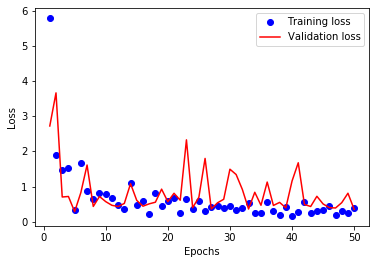

In [17]:
plot_train_val_loss(history2)

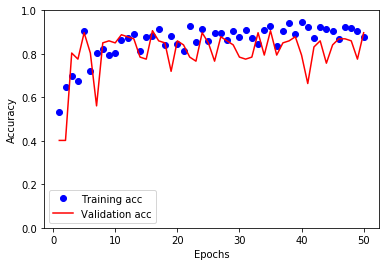

In [18]:
plot_train_val_acc(history2)

# スケーリングしてみる

In [19]:
model3 = models.Sequential()

model3.add(layers.Dense(64, activation="relu", input_shape=(30,)))
model3.add(layers.Dense(32, activation="relu"))
model3.add(layers.Dense(32, activation="relu"))
model3.add(layers.Dense(1, activation="sigmoid"))

In [20]:
model3.compile(optimizer=RMSprop(),
               loss=binary_crossentropy,
               metrics=["accuracy"])

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)


history3 = model3.fit(X_train_scaled,
                      y_train,
                      epochs=50,
                      validation_data=(X_val_scaled, y_val),
                      verbose=1
                      )

Train on 319 samples, validate on 107 samples
Epoch 1/50
319/319 [==============================] - 0s 914us/step - loss: 0.6724 - acc: 0.6144 - val_loss: 0.6380 - val_acc: 0.8037
Epoch 2/50
319/319 [==============================] - 0s 45us/step - loss: 0.6003 - acc: 0.8934 - val_loss: 0.5795 - val_acc: 0.8411
Epoch 3/50
319/319 [==============================] - 0s 45us/step - loss: 0.5343 - acc: 0.8903 - val_loss: 0.5232 - val_acc: 0.8692
Epoch 4/50
319/319 [==============================] - 0s 43us/step - loss: 0.4663 - acc: 0.9154 - val_loss: 0.4722 - val_acc: 0.8131
Epoch 5/50
319/319 [==============================] - 0s 48us/step - loss: 0.4078 - acc: 0.9028 - val_loss: 0.4227 - val_acc: 0.8318
Epoch 6/50
319/319 [==============================] - 0s 44us/step - loss: 0.3526 - acc: 0.9028 - val_loss: 0.4005 - val_acc: 0.8224
Epoch 7/50
319/319 [==============================] - 0s 41us/step - loss: 0.3032 - acc: 0.9122 - val_loss: 0.3418 - val_acc: 0.8785
Epoch 8/50
319/319 [==

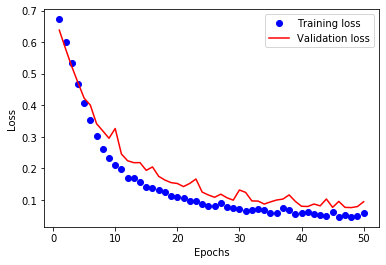

In [22]:
plot_train_val_loss(history3)

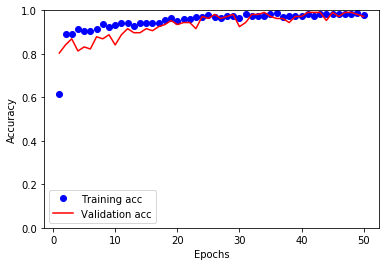

In [23]:
plot_train_val_acc(history3)

# その他

In [24]:
model.predict(X_train[0].reshape(1, -1))

array([[0.0099368]], dtype=float32)

In [25]:
model.predict(X_train[1].reshape(1, -1))

array([[0.6194851]], dtype=float32)

In [26]:
# 重み
model.layers[0].get_weights()

[array([[-0.206218  , -0.2484253 ],
        [-0.11473645,  0.02616142],
        [ 0.31484956,  0.02983377],
        [ 0.4217843 ,  0.2281836 ],
        [-0.37144533, -0.16699632],
        [-0.05153215,  0.34058377],
        [-0.52802384, -0.19127159],
        [ 0.05644777, -0.23523088],
        [-0.23057039,  0.07041498],
        [-0.15746488, -0.42518228],
        [ 0.14199643, -0.3301606 ],
        [ 0.2613413 ,  0.02896102],
        [ 0.24056016, -0.26925027],
        [ 0.2509306 ,  0.15515181],
        [ 0.06158282,  0.2250672 ],
        [-0.42684248, -0.19898534],
        [ 0.3072957 ,  0.14061102],
        [-0.43463904,  0.05510006],
        [-0.22748706, -0.09685452],
        [-0.46196   , -0.33061182],
        [-0.03237753, -0.26021367],
        [ 0.25271866, -0.40639856],
        [-0.26716664, -0.30370963],
        [ 0.02433385,  0.29233652],
        [ 0.05537465,  0.03164564],
        [-0.26848668, -0.29464433],
        [-0.4000569 ,  0.10310449],
        [-0.37105864, -0.324